**Prática de Segmentação de imagens**

In [12]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

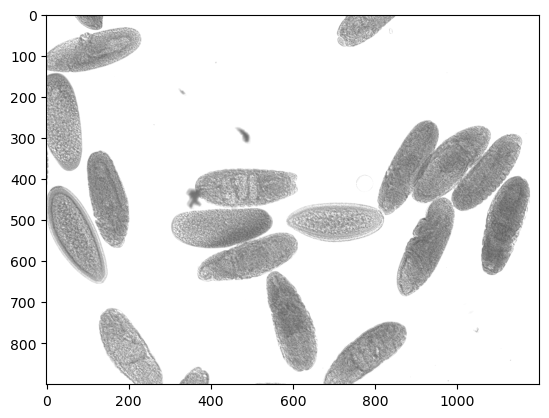

In [13]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


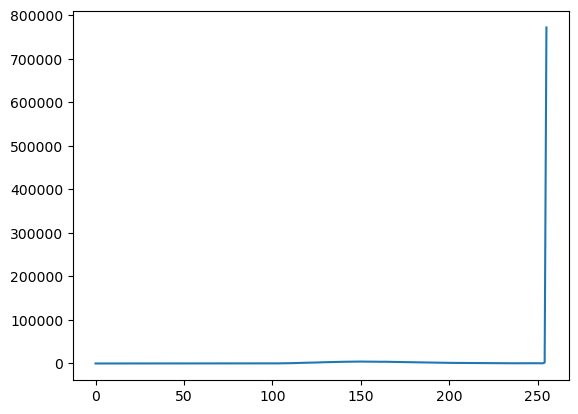

In [14]:
histg = cv2.calcHist([img1],[0],None,[256],[0,256])  
plt.plot(histg) 


# TreshHold

De olho, eu escolheria um treshold de aproximadamente 150


In [15]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

In [16]:
mean_value = np.mean(img1)
print(mean_value)
while mean_value<255//2:

    smaller_mask = img1 < mean_value
    larger_mask = img1 > mean_value

    image_smaller = np.zeros_like(img1)
    image_larger = np.zeros_like(img1)

    image_smaller[smaller_mask] = img1[smaller_mask]
    image_larger[larger_mask] = img1[larger_mask]
    mean_value = (np.mean(image_larger)-np.mean(image_smaller))//2
    print(mean_value)
print(mean_value)

228.95235185185186
228.95235185185186


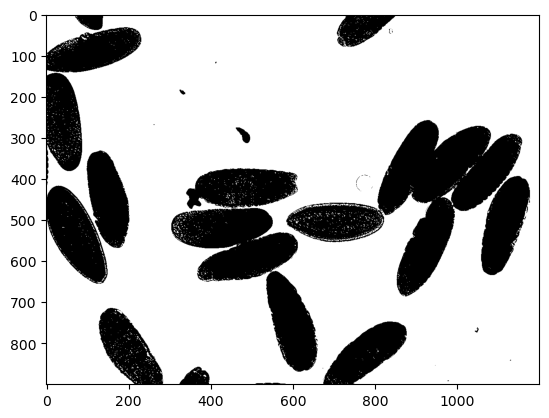

In [17]:
import numpy as np
import cv2


threshold = 228

output_image = np.where(img1 > threshold, 255, 0).astype(np.uint8)

plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

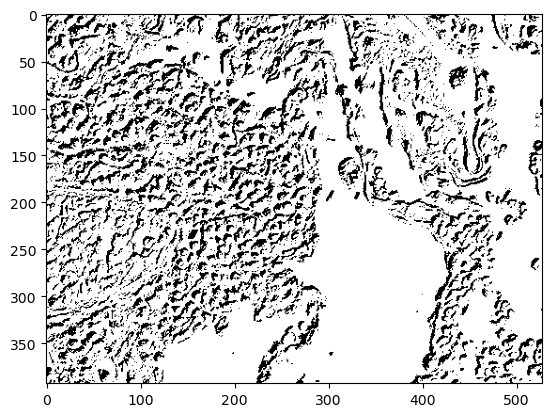

In [18]:
import numpy as np
import cv2

block_size = 2 
C = 5 

kernel = np.ones((block_size, block_size), np.float32) / (block_size ** 2)
local_mean = cv2.filter2D(image, -1, kernel)

threshold = local_mean - C

output_image_2 = np.where(image > threshold, 255, 0).astype(np.uint8)

plt.imshow(output_image_2, cmap='gray', vmin=0, vmax=255);


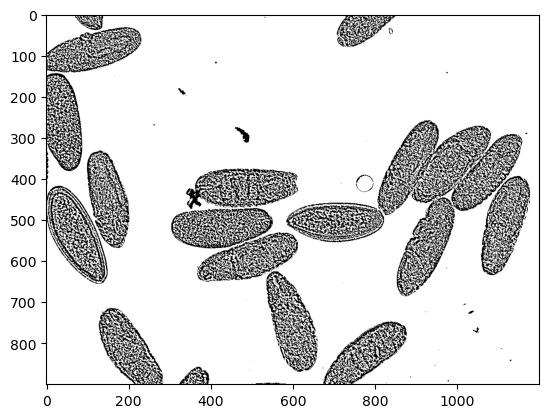

In [19]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);
th2 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

plt.imshow(th2, cmap='gray', vmin=0, vmax=255);

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

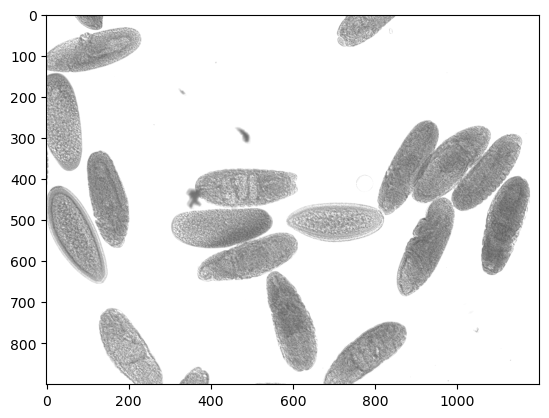

In [20]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

C:\Users\Samuel\AppData\Local\Temp\ipykernel_6588\1003291751.py:16: RuntimeWarning: invalid value encountered in divide
  between_class_variance = np.square(global_mean * cumulative_sum - cumulative_mean) / (cumulative_sum * (1-cumulative_sum))


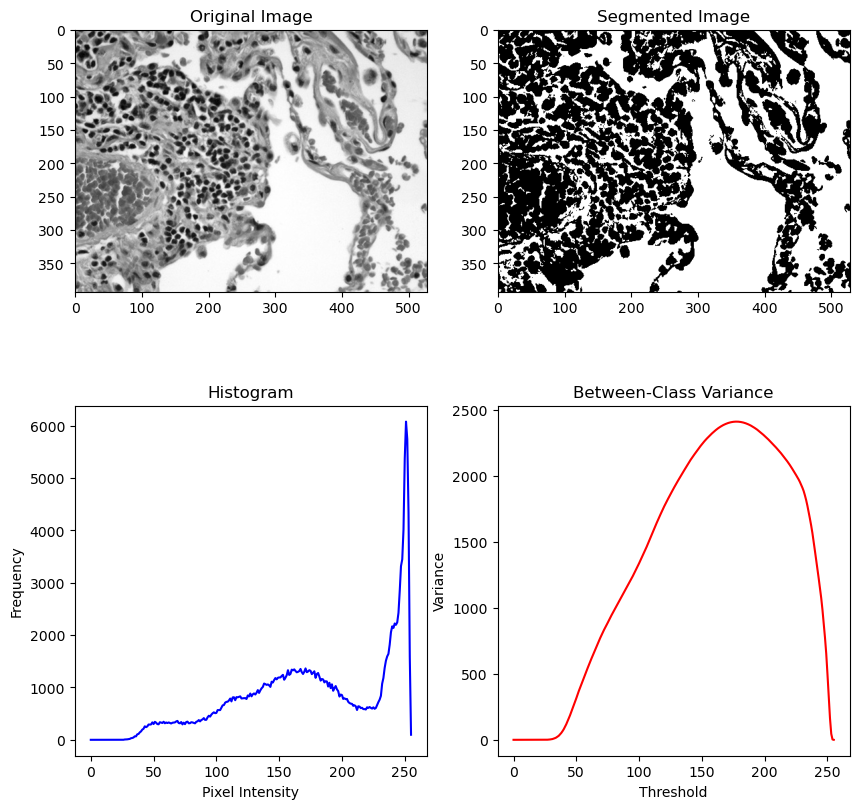

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
img = cv2.imread('HE.jpg', 0)
histogram = np.histogram(img.flatten(), bins=256, range=[0,256])[0]
total_pixels = img.shape[0] * img.shape[1] 

probability = histogram / total_pixels 

cumulative_sum = np.cumsum(probability) 

cumulative_mean = np.cumsum(probability * (np.arange(256))) 

global_mean = cumulative_mean[-1] 

between_class_variance = np.square(global_mean * cumulative_sum - cumulative_mean) / (cumulative_sum * (1-cumulative_sum)) 

between_class_variance[np.isnan(between_class_variance)] = 0 

threshold = np.argmax(between_class_variance) 

segmented_img = np.zeros_like(img) 
segmented_img[img > threshold] = 255 


# Plot the original image, segmented image, histogram, and between-class variance
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(segmented_img, cmap='gray')
ax[0, 1].set_title('Segmented Image')

# Plot the histogram
ax[1, 0].plot(histogram, color='b')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot the between-class variance
ax[1, 1].plot(between_class_variance, color='r')
ax[1, 1].set_title('Between-Class Variance')
ax[1, 1].set_xlabel('Threshold')
ax[1, 1].set_ylabel('Variance')

plt.show()

4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

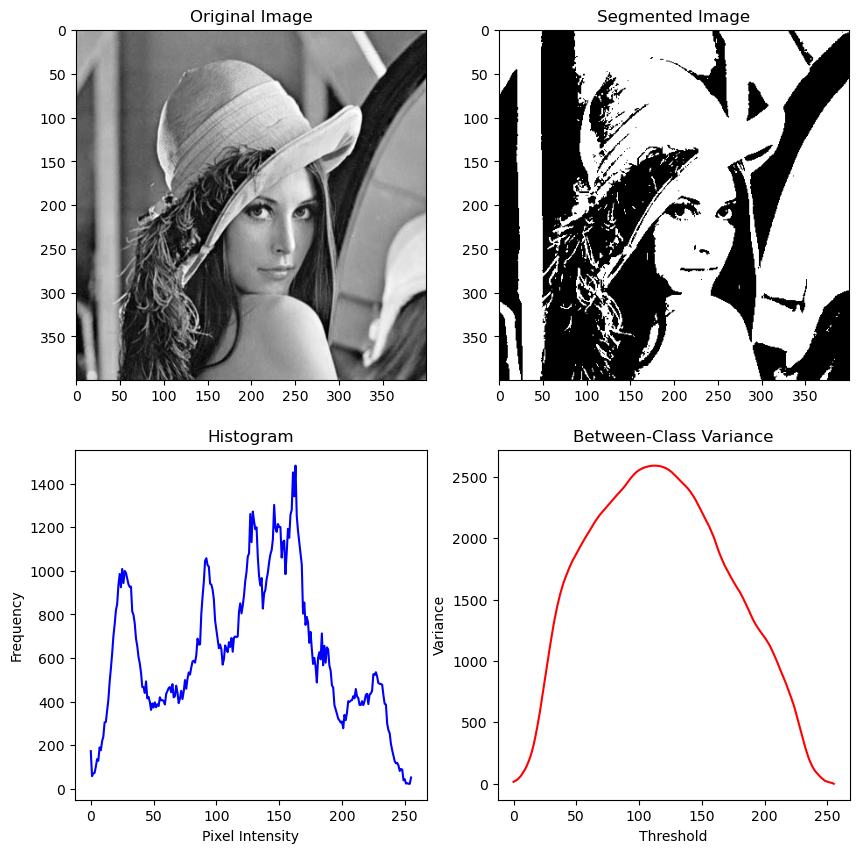

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
img = cv2.imread('Lenna.jpg', 0)
histogram = np.histogram(img.flatten(), bins=256, range=[0,256])[0]
total_pixels = img.shape[0] * img.shape[1] 

probability = histogram / total_pixels 

cumulative_sum = np.cumsum(probability) 

cumulative_mean = np.cumsum(probability * (np.arange(256))) 

global_mean = cumulative_mean[-1] 

between_class_variance = np.square(global_mean * cumulative_sum - cumulative_mean) / (cumulative_sum * (1-cumulative_sum)) 

threshold = np.argmax(between_class_variance) 

segmented_img = np.zeros_like(img) 
segmented_img[img > threshold] = 255 

# Plot the original image, segmented image, histogram, and between-class variance
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(segmented_img, cmap='gray')
ax[0, 1].set_title('Segmented Image')

# Plot the histogram
ax[1, 0].plot(histogram, color='b')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot the between-class variance
ax[1, 1].plot(between_class_variance, color='r')
ax[1, 1].set_title('Between-Class Variance')
ax[1, 1].set_xlabel('Threshold')
ax[1, 1].set_ylabel('Variance')

plt.show()

C:\Users\Samuel\AppData\Local\Temp\ipykernel_6588\1147513913.py:17: RuntimeWarning: invalid value encountered in divide
  between_class_variance = np.square(global_mean * cumulative_sum - cumulative_mean) / (cumulative_sum * (1-cumulative_sum))


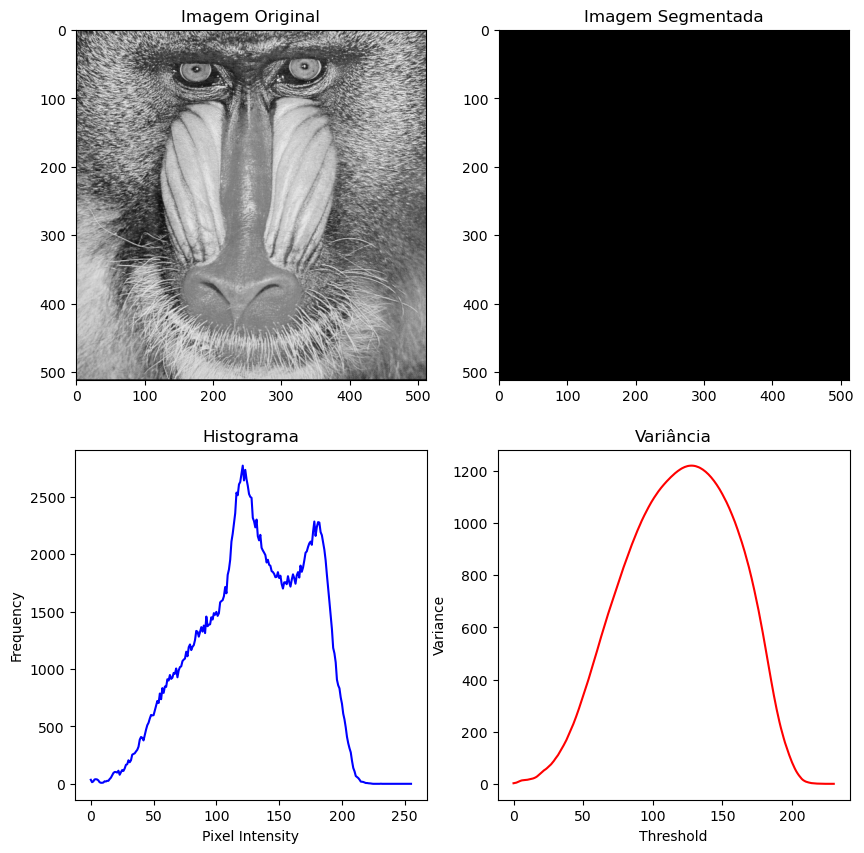

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
img = cv2.imread('madrill.tiff', 0)
img = np.array(img) 
histogram = np.histogram(img.flatten(), bins=256, range=[0,256])[0]
total_pixels = img.shape[0] * img.shape[1] 

probability = histogram / total_pixels 

cumulative_sum = np.cumsum(probability) 

cumulative_mean = np.cumsum(probability * (np.arange(256))) 

global_mean = cumulative_mean[-1] 

between_class_variance = np.square(global_mean * cumulative_sum - cumulative_mean) / (cumulative_sum * (1-cumulative_sum)) 

threshold = np.argmax(between_class_variance) 

segmented_img = np.zeros_like(img) 
segmented_img[img > threshold] = 255 

# Plot the original image, segmented image, histogram, and between-class variance
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Imagem Original')
ax[0, 1].imshow(segmented_img, cmap='gray')
ax[0, 1].set_title('Imagem Segmentada')

# Plot the histogram
ax[1, 0].plot(histogram, color='b')
ax[1, 0].set_title('Histograma')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Plot the between-class variance
ax[1, 1].plot(between_class_variance, color='r')
ax[1, 1].set_title('Variância')
ax[1, 1].set_xlabel('Threshold')
ax[1, 1].set_ylabel('Variance')

plt.show()